<a href="https://colab.research.google.com/github/dev0419/Pytorch_FreeCodeCamp/blob/main/custom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
from torch.utils.data import Dataset,DataLoader

In [6]:
import requests
import zipfile
from pathlib import Path

data_pth = Path('data/')
img_pth = data_pth / "pizza_steak_sushi"
if img_pth.is_dir():
    print(f"{img_pth} directory exists")
else:
    print(f"Did not find {img_pth} directory creating one....")
    img_pth.mkdir(parents=True,exist_ok=True)

with open(data_pth / "pizza_steak_sushi.zip","wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print(f"Downloading pizza,steak, sushi data....")
    f.write(request.content)

with zipfile.ZipFile(data_pth / "pizza_steak_sushi.zip", "r") as zip_ref:
    print(f"Unzipping the pizzaa, steak,sushi data .....")
    zip_ref.extractall(img_pth)


Did not find data/pizza_steak_sushi directory creating one....
Unzipping the pizzaa, steak,sushi data .....


In [7]:
import os

def walk_through_dir(dir_pth):
    for dirpath,dirnames,filenames in os.walk(dir_pth):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath} ")

In [8]:
walk_through_dir(data_pth)

There are 1 directories and 1 images in data 
There are 2 directories and 0 images in data/pizza_steak_sushi 
There are 3 directories and 0 images in data/pizza_steak_sushi/train 
There are 0 directories and 75 images in data/pizza_steak_sushi/train/steak 
There are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi 
There are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza 
There are 3 directories and 0 images in data/pizza_steak_sushi/test 
There are 0 directories and 19 images in data/pizza_steak_sushi/test/steak 
There are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi 
There are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza 


In [9]:
walk_through_dir(img_pth)

There are 2 directories and 0 images in data/pizza_steak_sushi 
There are 3 directories and 0 images in data/pizza_steak_sushi/train 
There are 0 directories and 75 images in data/pizza_steak_sushi/train/steak 
There are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi 
There are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza 
There are 3 directories and 0 images in data/pizza_steak_sushi/test 
There are 0 directories and 19 images in data/pizza_steak_sushi/test/steak 
There are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi 
There are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza 


In [10]:
train_dir = img_pth / "train"
test_dir = img_pth / "test"
train_dir,test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

Random image path: data/pizza_steak_sushi/train/steak/3518960.jpg
Image class: steak
Image height: 512
Image width: 384


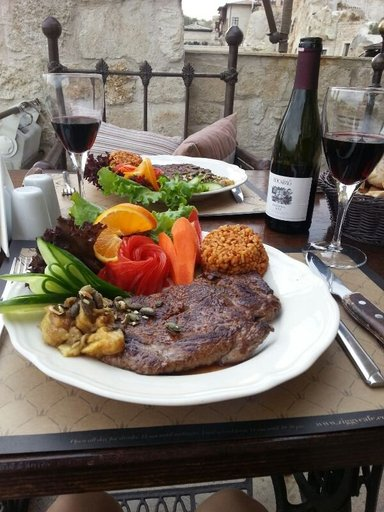

In [11]:
import random
from PIL import Image

random.seed(42)
img_pth_list = list(img_pth.glob("*/*/*.jpg"))
random_img_pth= random.choice(img_pth_list)
img_class  = random_img_pth.parent.stem
img = Image.open(random_img_pth)
print(f"Random image path: {random_img_pth}")
print(f"Image class: {img_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

(-0.5, 383.5, 511.5, -0.5)

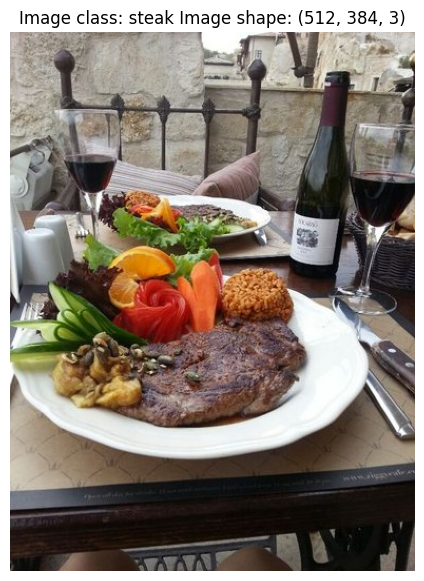

In [12]:
import matplotlib.pyplot as plt
import numpy as np

img_arr = np.asarray(img)
plt.figure(figsize=(10,7))
plt.imshow(img_arr)
plt.title(f"Image class: {img_class} Image shape: {img_arr.shape}")
plt.axis("off")

In [13]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

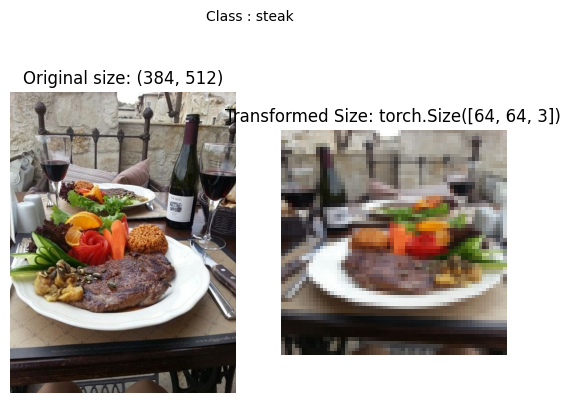

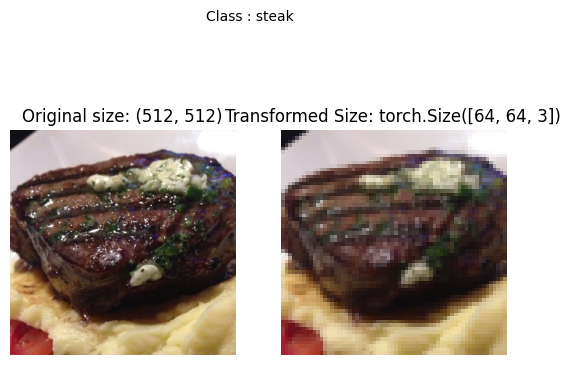

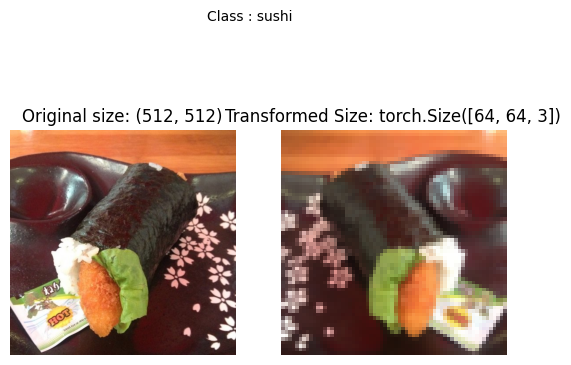

In [14]:
def plot_transformed_image(img_pths,transform,n=3,seed=42):
    random.seed(seed)
    random_img_pths = random.sample(img_pths,k=n)
    for img_pth in random_img_pths:
        with Image.open(img_pth) as f:
            fig,ax = plt.subplots(1,2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original size: {f.size}")
            ax[0].axis("off")
            transformed_img = transform(f).permute(1,2,0)
            ax[1].imshow(transformed_img)
            ax[1].set_title(f"Transformed Size: {transformed_img.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class : {img_pth.parent.stem}", fontsize=10)

plot_transformed_image(img_pth_list ,transform=data_transform,n=3)



In [15]:
train_data = datasets.ImageFolder(root=train_dir,transform=data_transform,target_transform=None)
test_data = datasets.ImageFolder(root=test_dir,transform=data_transform)
print(f"Train data: {train_data}\n Test data:{test_data}")

Train data: Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
 Test data:Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [16]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [17]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [18]:
len(train_data),len(test_data)

(225, 75)

In [19]:
img,label = train_data[0][0],train_data[0][1]
print(f"Image tensor:\n {img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype:{img.dtype}")
print(f"Label datatype: {type(label)}")

Image tensor:
 tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.0

Original shape:torch.Size([3, 64, 64])
Permutted shape: torch.Size([64, 64, 3])


Text(0.5, 1.0, 'pizza')

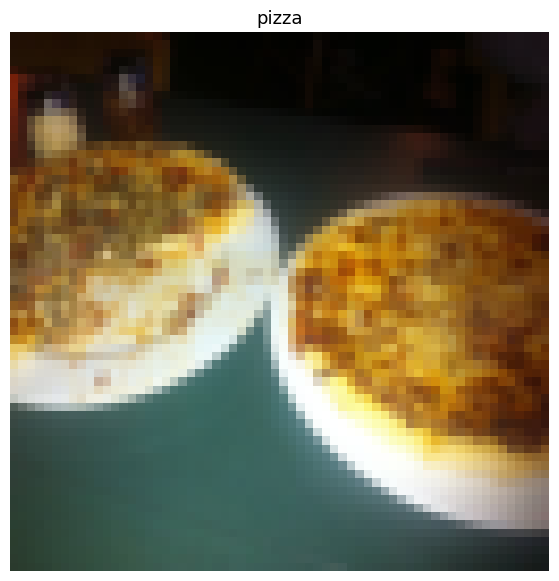

In [21]:
img_permute = img.permute(1,2,0)
print(f"Original shape:{img.shape}")
print(f"Permutted shape: {img_permute.shape}")
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis('off')
plt.title(class_names[label],fontsize=13)

In [22]:
from torch.utils.data import DataLoader
train_loader = DataLoader(dataset=train_data,batch_size=1,num_workers=1,shuffle=True)
test_loader = DataLoader(dataset=test_data,batch_size=1,num_workers=1)
train_loader,test_loader

(<torch.utils.data.dataloader.DataLoader at 0x792015aeaf50>,
 <torch.utils.data.dataloader.DataLoader at 0x792015aeb1f0>)

In [23]:
img,label = next(iter(train_loader))
print(f"image shape: {img.shape}")
print(f"label shape: {label.shape}")

image shape: torch.Size([1, 3, 64, 64])
label shape: torch.Size([1])


In [24]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [25]:
train_data.classes,train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [27]:
target_dir = train_dir
print(f"Train directory: {target_dir}")
class_names_found = sorted([entry.name for entry in list(os.scandir(img_pth / "train"))])
print(f"Class names found: {class_names_found}")

Train directory: data/pizza_steak_sushi/train
Class names found: ['pizza', 'steak', 'sushi']
